In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
df=pd.read_csv('CC GENERAL.csv')

### we perform k means and hierarchical clustering and then pca and tsne with the credit cards dataset

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [6]:
df.shape

(8636, 18)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [10]:
df=df.drop(columns=['CUST_ID'])

In [ ]:
### we perform 

In [11]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df)

'''scale numeric features now'''
X = ss.transform(df)

X

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

### first k means clustering

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.2089232822022867


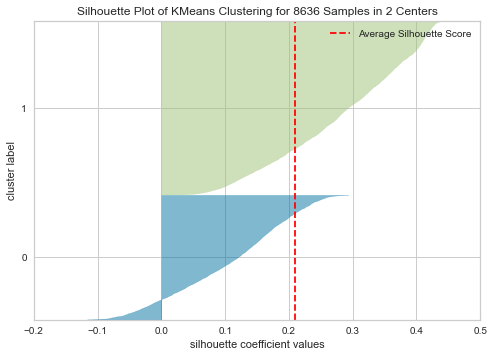

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.24754638153191033


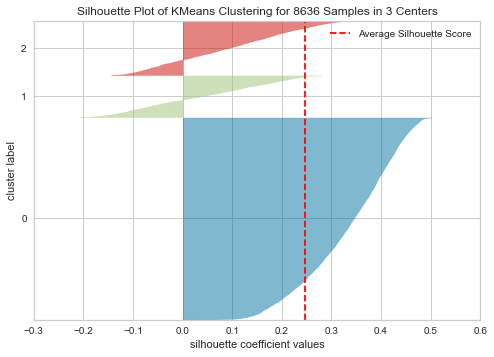

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.19703675772374923


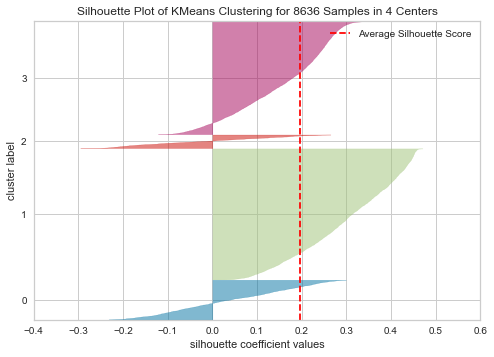

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.19223317739937715


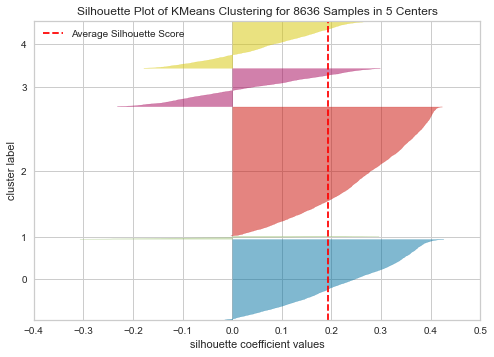

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.20724257057194043


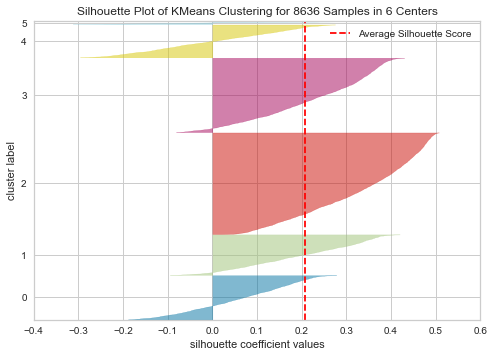

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.219694021309588


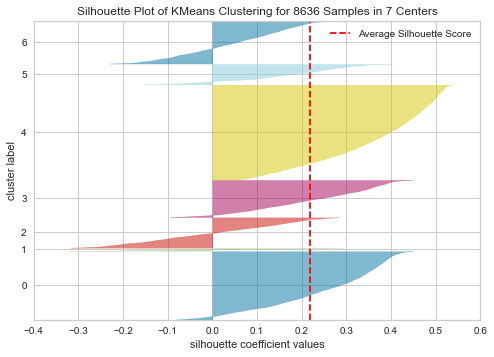

In [12]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)       
    visualizer.poof()

In [13]:
df_scaled=pd.DataFrame(X,columns=df.columns)

### with 3 clusters we have the highest silhouette score , not very high though

In [14]:
model_kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

In [15]:
df_scaled['K_means_segments'] =model_kmeans.labels_

In [16]:
cluster_profile = df_scaled.groupby('K_means_segments').mean()

### here we have a first look how clusters are divided 

In [17]:
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
K_means_segments,,,,,,,,,,,,,,,,,
0,-0.369681,-0.170328,-0.233566,-0.204603,-0.176097,-0.311742,-0.059786,-0.233709,-0.048289,-0.335909,-0.301130,-0.245168,-0.342998,-0.287539,-0.139650,0.015565,-0.025129
1,0.303323,0.419872,1.511683,1.263717,1.251221,-0.249094,1.133379,1.539164,0.957351,-0.364497,-0.254601,1.667687,0.888947,0.824408,0.157942,0.472298,0.295338
2,1.152442,0.313808,-0.295296,-0.211762,-0.309074,1.363250,-0.654289,-0.316062,-0.560971,1.543432,1.327688,-0.372694,0.598260,0.440132,0.401730,-0.424590,-0.134652


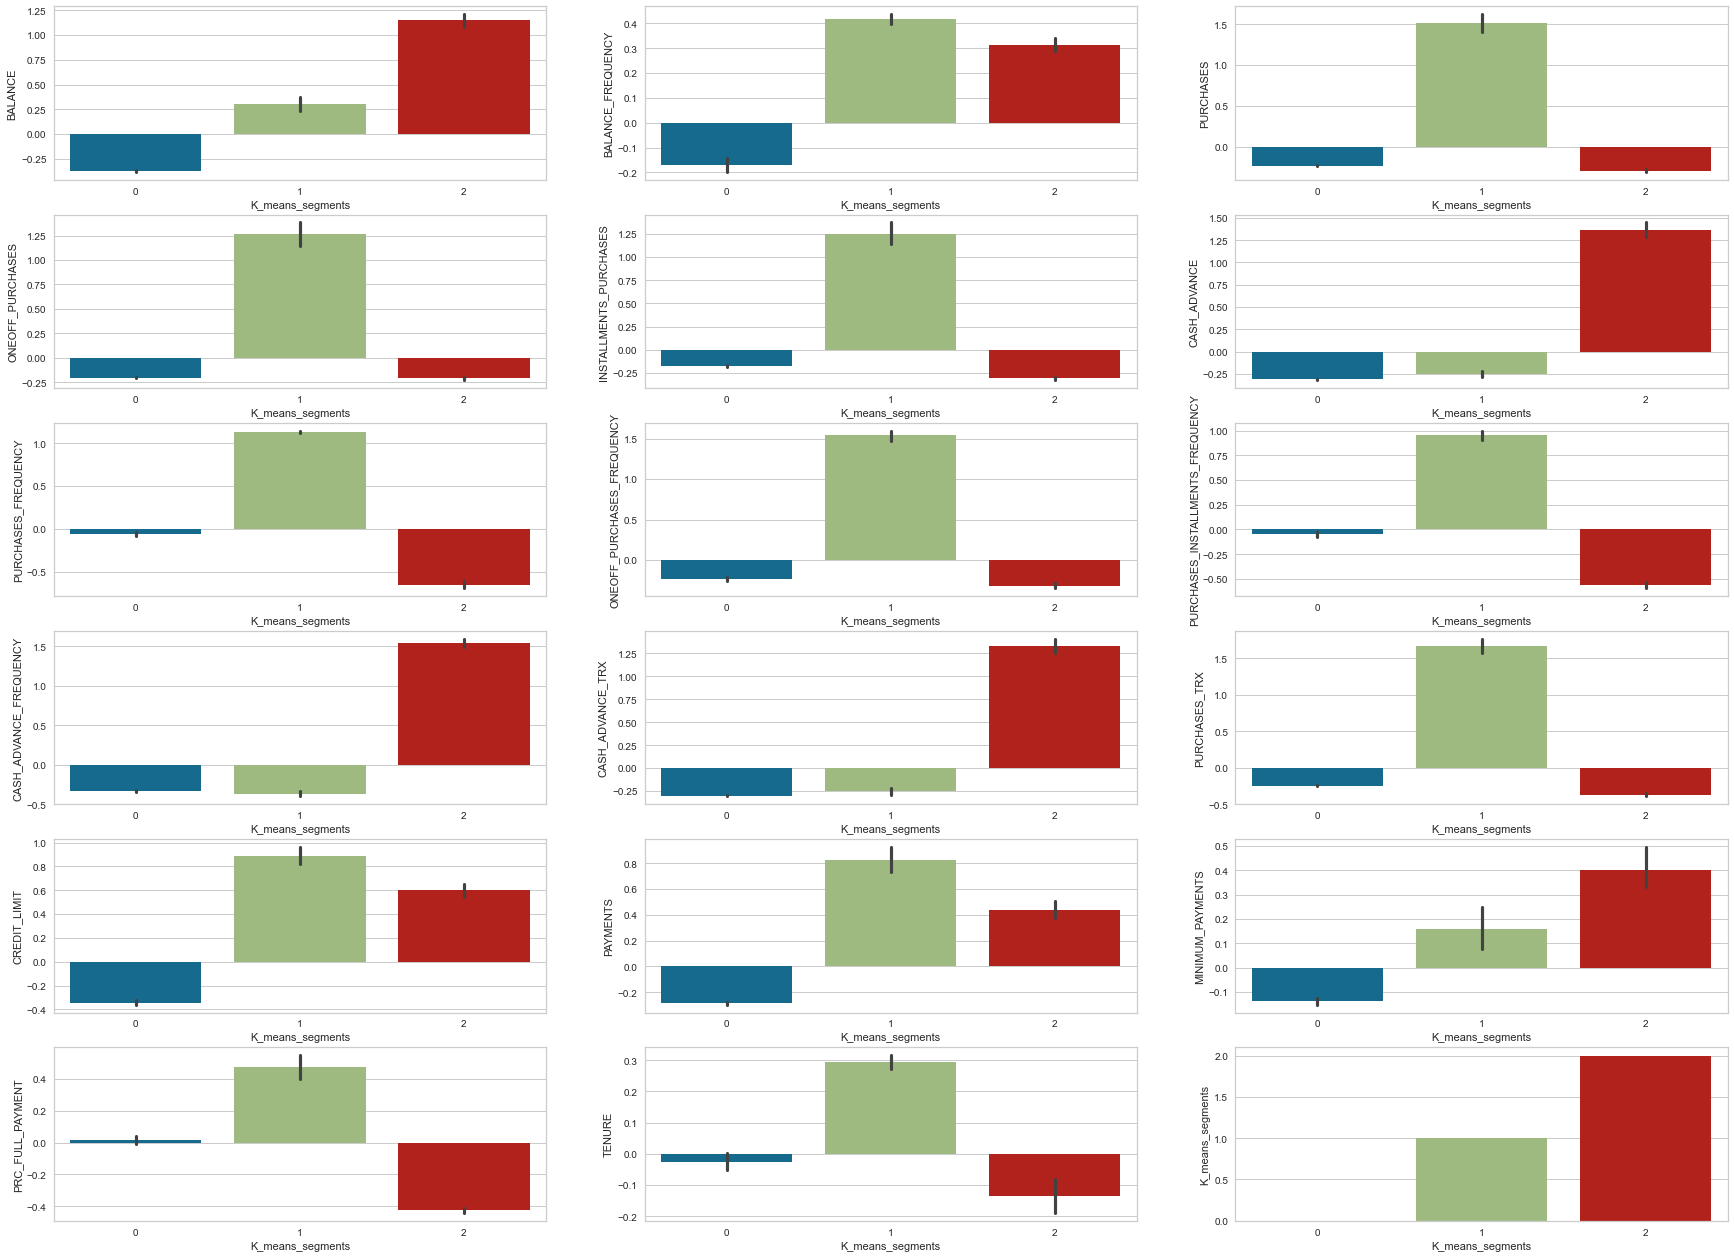

In [18]:
columns = list(df_scaled)

plt.figure(figsize = (30,30))

for i, column in enumerate(columns):

    ax = plt.subplot(8, 3, i + 1) # nrows, ncols, axes position

    sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled[column], ax=ax)

plt.show()

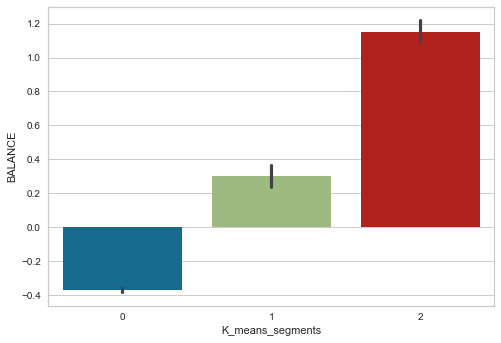

In [19]:
sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled['BALANCE'])


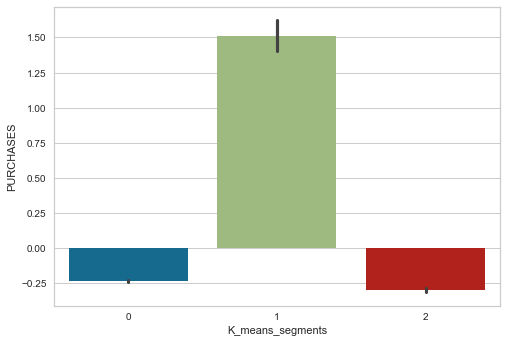

In [20]:
sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled['PURCHASES'])

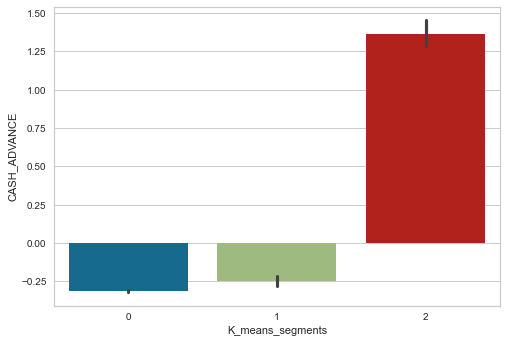

In [21]:
sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled['CASH_ADVANCE'])

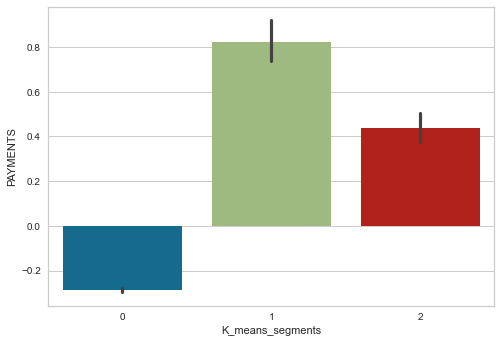

In [22]:
sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled['PAYMENTS'])

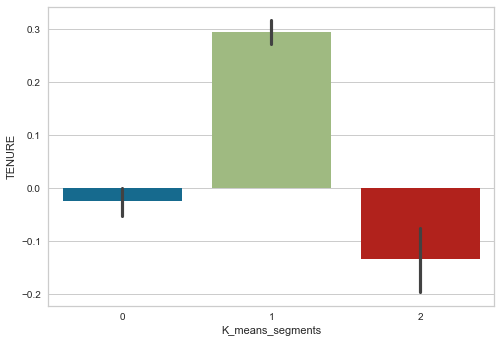

In [23]:
sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled['TENURE'])

### clusters as we see in the scatterplots are devided quite well between each other

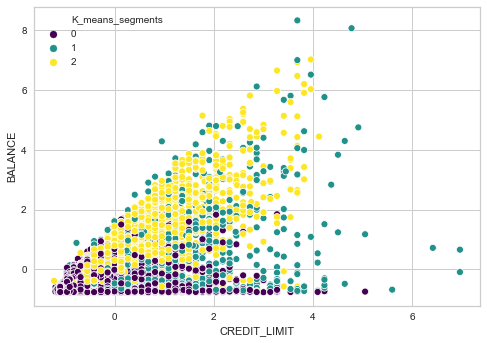

In [24]:
sns.scatterplot(data=df_scaled,x='CREDIT_LIMIT',y='BALANCE',hue=df_scaled['K_means_segments'],palette='viridis')

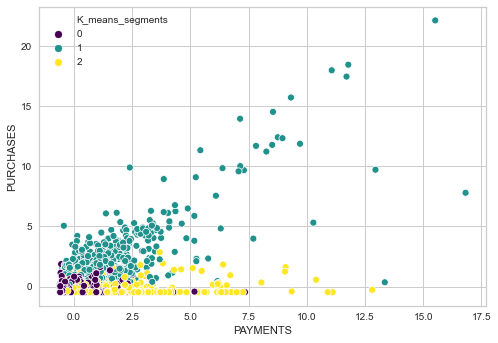

In [25]:
sns.scatterplot(data=df_scaled,x='PAYMENTS',y='PURCHASES',hue=df_scaled['K_means_segments'],palette='viridis')

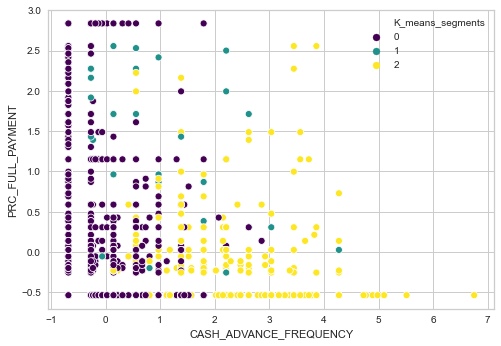

In [26]:
sns.scatterplot(data=df_scaled,x='CASH_ADVANCE_FREQUENCY',y='PRC_FULL_PAYMENT',hue=df_scaled['K_means_segments'],palette='viridis')

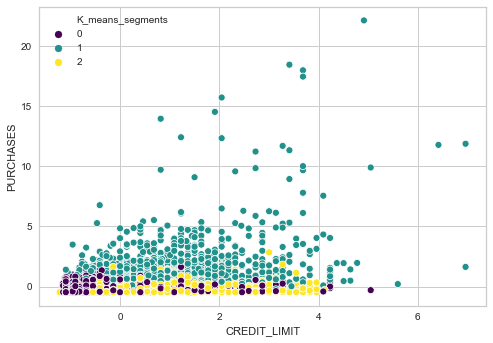

In [27]:
sns.scatterplot(data=df_scaled,x='CREDIT_LIMIT',y='PURCHASES',hue=df_scaled['K_means_segments'],palette='viridis')

### then we go on with hierarchical clustering

In [12]:

Z = linkage(X, 'ward')

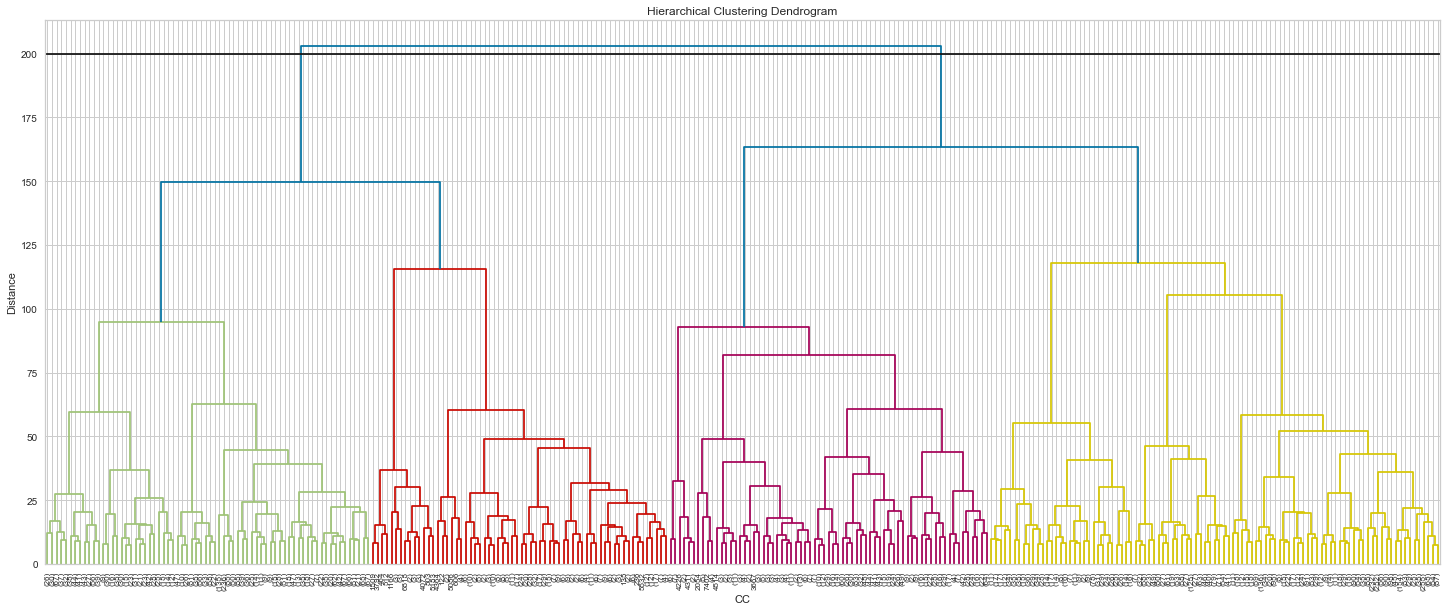

In [13]:

max_d = 200
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('CC')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=300,                  
    leaf_rotation=90.,  
    leaf_font_size=8.,      
)
plt.axhline(y=max_d, c='k')
plt.show()


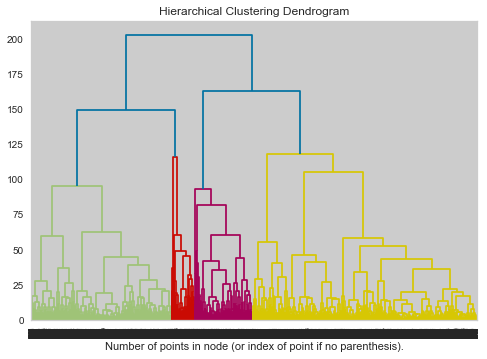

In [14]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)


    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 2, 3, ..., 0, 0, 0], dtype=int64)

### in hierarchical clustering we go on with 4 clusters as we see them separating 

In [16]:
cluster.labels_

array([0, 2, 3, ..., 0, 0, 0], dtype=int64)

In [17]:
df_scaled=pd.DataFrame(X,columns=df.columns)

In [18]:
df_scaled['cluster']=pd.DataFrame(cluster.labels_)

In [19]:
cluster_profile = df_scaled.groupby('cluster').mean()

In [20]:
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,-0.296650,-0.390350,-0.316816,-0.234703,-0.317509,-0.161654,-0.583710,-0.383538,-0.500957,-0.088349,-0.147579,-0.419796,-0.351806,-0.288124,-0.100689,-0.157521,-0.278463
1,1.087256,0.450113,2.714735,2.361149,2.079363,-0.148503,1.132261,1.716107,1.102059,-0.291402,-0.198697,2.775138,1.351440,1.567090,0.392059,-0.002049,0.328997
2,1.476543,0.393857,-0.234865,-0.161173,-0.259159,1.495789,-0.589977,-0.214988,-0.519637,1.508835,1.461151,-0.294196,0.897412,0.678806,0.570214,-0.412044,0.198807
3,-0.308521,0.387351,0.166261,0.061895,0.279014,-0.333516,0.990099,0.424069,0.834344,-0.432664,-0.333651,0.344850,-0.025092,-0.071129,-0.136768,0.420283,0.308813


### I suspect clusters 1 and 2 are the ones that show interest to the bank

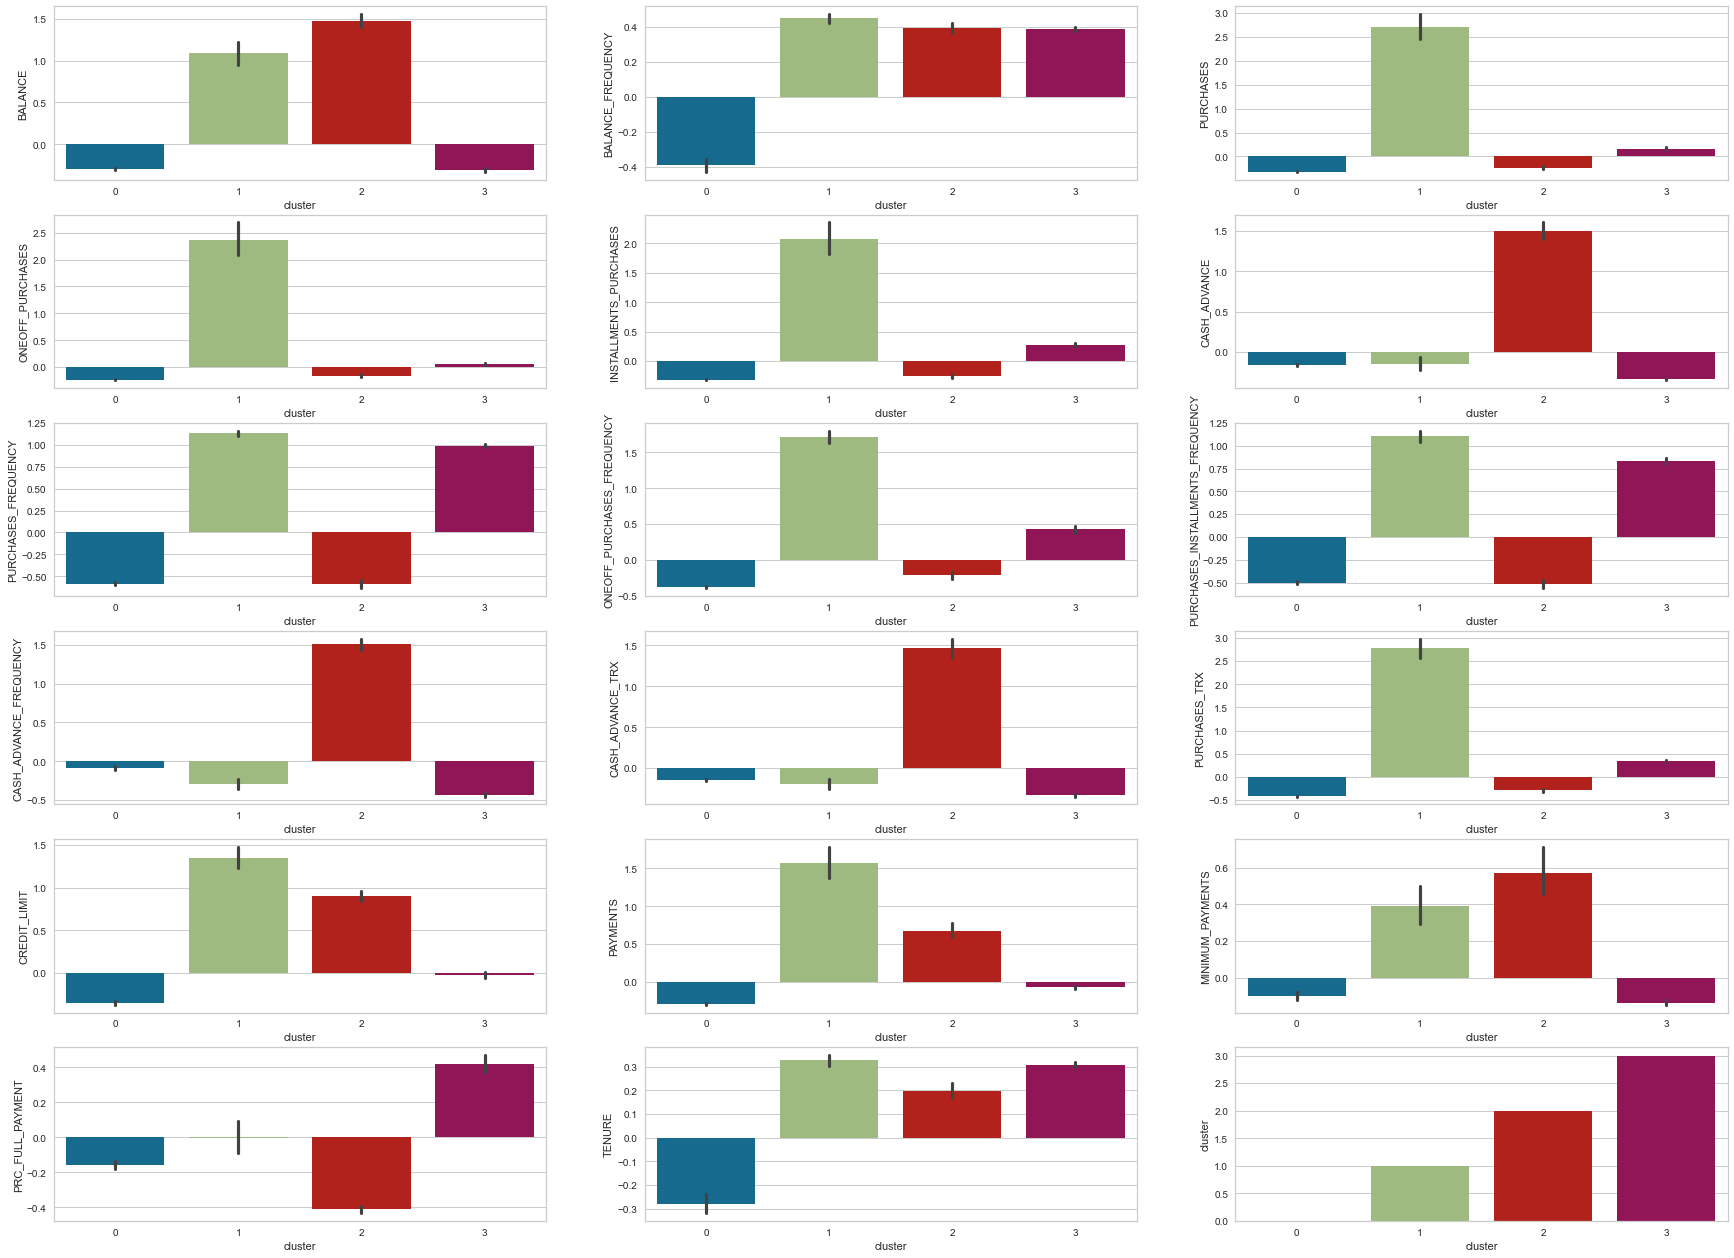

In [38]:
columns = list(df_scaled)

'''plotting: barplot'''
plt.figure(figsize = (30,30))

for i, column in enumerate(columns):

    ax = plt.subplot(8, 3, i + 1)
    sns.barplot(x = df_scaled['cluster'], y = df_scaled[column], ax=ax)

plt.show()

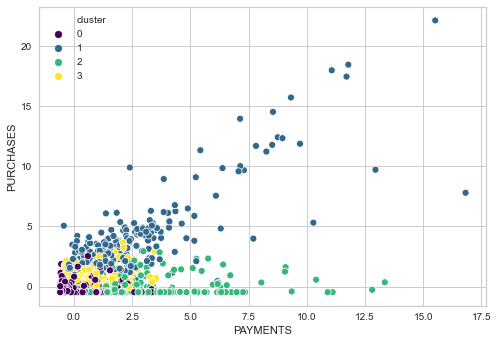

In [39]:
sns.scatterplot(data=df_scaled,x='PAYMENTS',y='PURCHASES',hue=df_scaled['cluster'],palette='viridis')

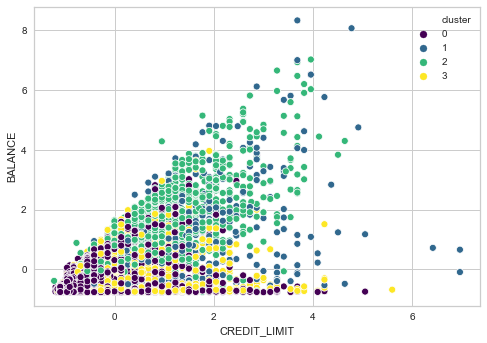

In [40]:
sns.scatterplot(data=df_scaled,x='CREDIT_LIMIT',y='BALANCE',hue=df_scaled['cluster'],palette='viridis')

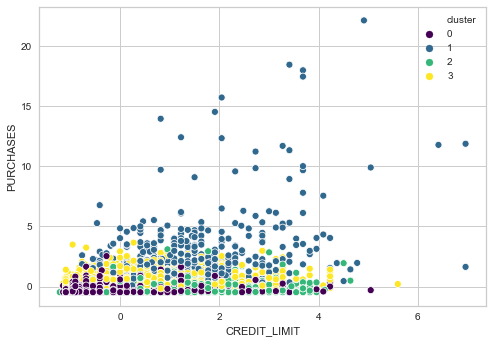

In [41]:
sns.scatterplot(data=df_scaled,x='CREDIT_LIMIT',y='PURCHASES',hue=df_scaled['cluster'],palette='viridis')

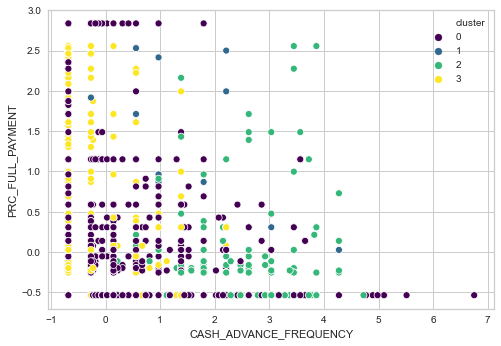

In [42]:
sns.scatterplot(data=df_scaled,x='CASH_ADVANCE_FREQUENCY',y='PRC_FULL_PAYMENT',hue=df_scaled['cluster'],palette='viridis')

### k means and the choice of 3 clusters seem to be have better results in scatterplots(more easily separated clusters)

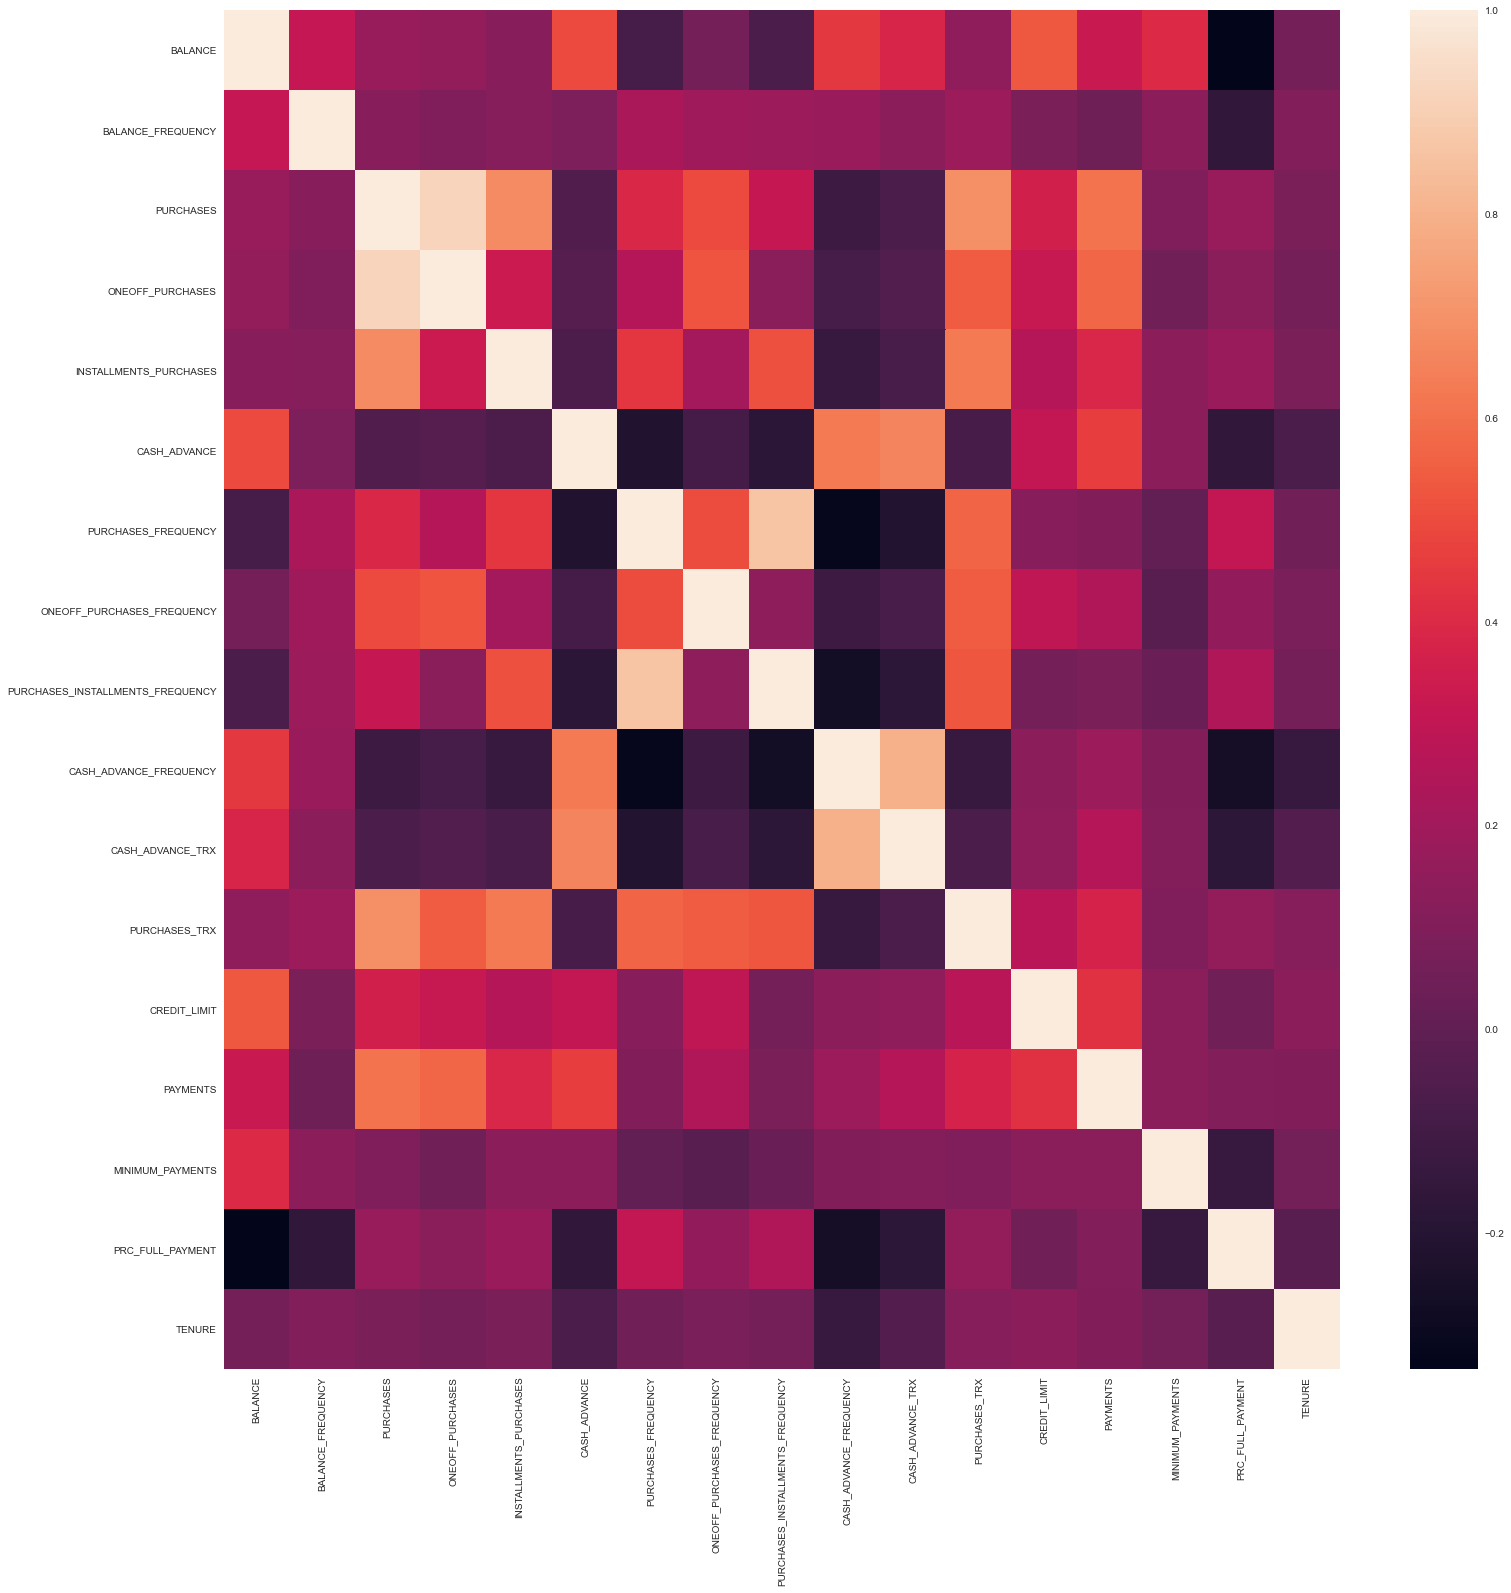

In [43]:
fig, ax=plt.subplots(figsize = (25,25))
ax = sns.heatmap(df.corr(),ax=ax)

### then we go on with pca and tsne

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

We can explain more than 80% of variance with any number of dimensions more than:  2


Text(0, 0.5, 'cumulative explained variance')

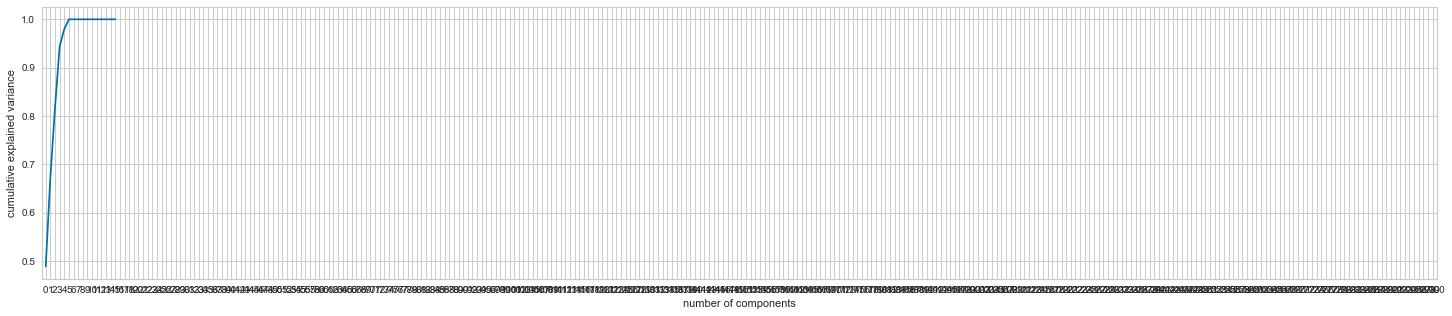

In [49]:

X=df.iloc[:,1:]
y=df.iloc[:,0]

pca = PCA()
pc = pca.fit_transform(X)
ratio = pca.explained_variance_ratio_
sum_ratio = np.cumsum(ratio)
n = np.where(sum_ratio >.8)
n_components = n[0][0]
print("We can explain more than 80% of variance with any number of dimensions more than: ",n_components)
pca = pca.fit(X)
plt.figure(figsize=(25,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,301))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
from sklearn import decomposition

In [23]:
pca = decomposition.PCA(n_components=2)

In [24]:
pc = pca.fit_transform(X)

In [21]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

In [ ]:
x_pca = pca.transform(scaled_data)

### first we have pca with hierarchical clustering, where we see again a somewhat mixed result

Text(0, 0.5, 'Second Principal Component')

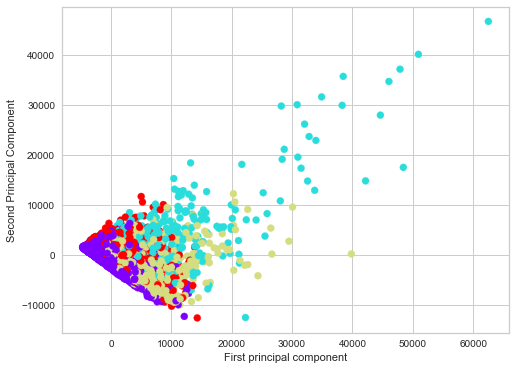

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(projected[:,0],projected[:,1],c=df_scaled['cluster'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [25]:
X=df_scaled.iloc[:,1:]

tsne = TSNE(random_state=0)

tsne_X= tsne.fit_transform(X)

In [27]:
tsne_df = pd.DataFrame({'a':tsne_X[:,0], #the  first dimension created
                        'b':tsne_X[:,1], #the second dimension
                        'target':df_scaled['cluster']})
tsne_df.head()

,a,b,target
0,39.793602,-27.745243,0
1,-69.628952,-11.496835,2
2,-46.328529,55.485966,3
3,29.626167,-79.794968,0
4,62.179630,-45.113327,0


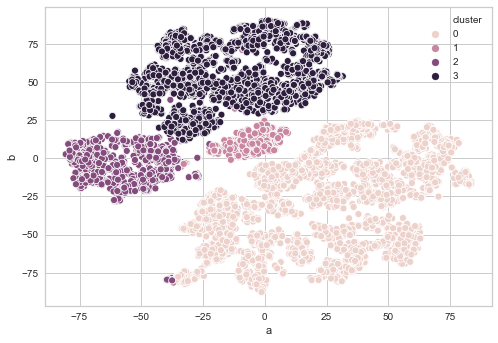

In [28]:
sns.scatterplot(x="a", y="b",
              hue=df_scaled['cluster'],
              legend='full',
              data=tsne_df);

### however tsne separates clusters well, we see the fourth clusters clearly

Text(0, 0.5, 'Second Principal Component')

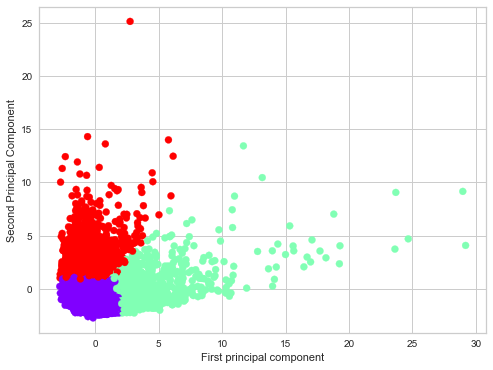

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(projected[:,0],projected[:,1],c=df_scaled['K_means_segments'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### then pca for k means shows clearly separated 3 clusters

In [19]:
from sklearn.manifold import TSNE

In [20]:
X=df_scaled.iloc[:,1:]

tsne = TSNE(random_state=0)

tsne_X= tsne.fit_transform(X)

In [22]:
tsne_df = pd.DataFrame({'a':tsne_X[:,0], #the  first dimension created
                        'b':tsne_X[:,1], #the second dimension
                        'target':df_scaled['K_means_segments']})
tsne_df.head()

,a,b,target
0,47.917427,-14.253130,0
1,-68.946579,-8.835253,2
2,-29.535570,-8.580763,0
3,-15.110901,-55.243736,0
4,15.862738,0.275991,0


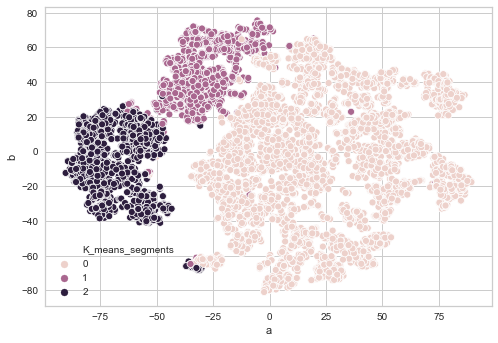

In [25]:
sns.scatterplot(x="a", y="b",
              hue=df_scaled['K_means_segments'],
              legend='full',
              data=tsne_df);

### the same good separation is shown with tsne